### 필요한 라이브러리 설치

In [185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# 폰트지정
plt.rc('font', family='Malgun Gothic')

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

### 데이터 로드

In [114]:
# 2023년 1월 ~ 12월 서울시 공공자전거 이용 데이터
# 2023년 1월 ~ 12월 서울시 기상 데이터
file_path1 = 'dataset/seoul_bicycle_daily_2023.csv'
file_path2 = 'dataset/OBS_ASOS_DD_2023.csv'
df1 = pd.read_csv(file_path1, encoding='cp949')
df2 = pd.read_csv(file_path2, encoding='cp949')

### 데이터셋 확인
- 데이터타입
- 결측치 
- 이상치

In [115]:
# 데이터타입 및 결측치 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여일시    365 non-null    object
 1   대여건수    365 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [116]:
df1.head()

,대여일시,대여건수
0,2023-01-01,"38,037"
1,2023-01-02,"56,609"
2,2023-01-03,"61,252"
3,2023-01-04,"67,721"
4,2023-01-05,"68,711"


In [117]:
df1.tail()

,대여일시,대여건수
360,2023-12-27,"82,145"
361,2023-12-28,"82,354"
362,2023-12-29,"84,168"
363,2023-12-30,"15,214"
364,2023-12-31,"29,130"


In [118]:
# 데이터타입 확인(자세히)
# 대여일시, 대여건수 -> object타입
print(df1.dtypes)

대여일시    object
대여건수    object
dtype: object


In [119]:
# 결측치 확인(자세히) -> 결측치 없음
df1.isnull().sum()

대여일시    0
대여건수    0
dtype: int64

In [120]:
# 이상치 확인을 위해 [대여건수] 컬럼을 정수 타입으로 변경
# 쉼표 제거 및 정수형 변환
df1['대여건수'] = df1['대여건수'].str.replace(',','').astype(int)

In [121]:
# 변환된 데이터타입 확인
print(df1.dtypes)

대여일시    object
대여건수     int32
dtype: object


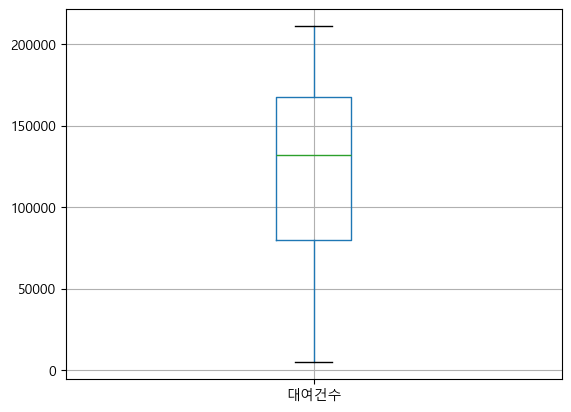

In [122]:
# 이상치 확인 -> 이상치 없음
df1.boxplot(column=['대여건수'])
plt.show()

In [123]:
# 데이터타입 및 결측치 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   일강수량(mm)       150 non-null    float64
 5   평균 상대습도(%)     365 non-null    float64
 6   합계 일사량(MJ/m2)  365 non-null    float64
 7   일 최심적설(cm)     16 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 22.9+ KB


In [124]:
df2.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm)
0,108,서울,2023-01-01,-0.2,NaN,54.5,10.81,NaN
1,108,서울,2023-01-02,-4.5,NaN,45.9,11.63,NaN
2,108,서울,2023-01-03,-5.0,NaN,49.0,11.77,NaN
3,108,서울,2023-01-04,-1.8,NaN,51.4,10.89,NaN
4,108,서울,2023-01-05,-1.6,NaN,58.1,6.09,NaN


In [125]:
df2.tail()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm)
360,108,서울,2023-12-27,1.5,NaN,76.6,9.47,NaN
361,108,서울,2023-12-28,1.2,NaN,69.5,9.25,NaN
362,108,서울,2023-12-29,1.3,NaN,71.0,5.43,NaN
363,108,서울,2023-12-30,0.6,13.1,92.0,0.69,12.2
364,108,서울,2023-12-31,2.1,4.7,95.5,3.06,8.8


In [126]:
# 데이터타입 확인(자세히)
# 대여일시, 대여건수 -> object타입
print(df2.dtypes)

지점                 int64
지점명               object
일시                object
평균기온(°C)         float64
일강수량(mm)         float64
평균 상대습도(%)       float64
합계 일사량(MJ/m2)    float64
일 최심적설(cm)       float64
dtype: object


In [127]:
# 결측치 확인
# 기상 데이터에는 일강수량, 일 최심적설에 결측치가 존재
df2.isnull().sum()

지점                 0
지점명                0
일시                 0
평균기온(°C)           0
일강수량(mm)         215
평균 상대습도(%)         0
합계 일사량(MJ/m2)      0
일 최심적설(cm)       349
dtype: int64

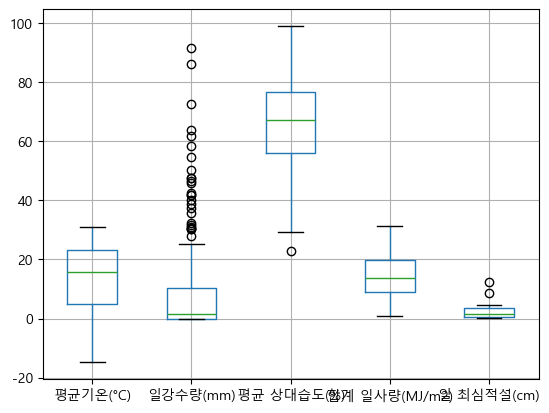

In [128]:
# 이상치 확인
df2.boxplot(column=['평균기온(°C)','일강수량(mm)','평균 상대습도(%)','합계 일사량(MJ/m2)','일 최심적설(cm)'])
plt.show()

### 데이터 전처리
- 불필요한 컬럼 제거
- 컬럼명 변경
- 데이터타입 변환
- 결측치 처리
- 이상치 제거

In [129]:
# 컬럼명 변경
df1.rename(columns={'대여일시': 'date', '대여건수': 'count'}, inplace=True)
print(df1.columns)

Index(['date', 'count'], dtype='object')


In [130]:
# 대여일 데이터타입 변경
df1['date'] = pd.to_datetime(df1['date'])
print(df1.dtypes)

date     datetime64[ns]
count             int32
dtype: object


In [131]:
# 불필요한 데이터 컬럼 제거(지점, 지점명 불필요)
df2 = df2.iloc[: , 2: ]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             365 non-null    object 
 1   평균기온(°C)       365 non-null    float64
 2   일강수량(mm)       150 non-null    float64
 3   평균 상대습도(%)     365 non-null    float64
 4   합계 일사량(MJ/m2)  365 non-null    float64
 5   일 최심적설(cm)     16 non-null     float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [132]:
# 컬럼명 변경
# date = 일시, avg_temperature = 평균기온(°C), precipitation = 일강수량(mm), 
# avg_humidity = 평균 상대습도(%), solar_radiation = 합계 일사량(MJ/m2), snow_depth = 일 최심적설(cm)

df2.rename(columns={
    '일시': 'date',
    '평균기온(°C)': 'avg_temperature',
    '일강수량(mm)': 'precipitation',
    '평균 상대습도(%)': 'avg_humidity',
    '합계 일사량(MJ/m2)': 'solar_radiation',
    '일 최심적설(cm)': 'snow_depth'
}, inplace=True)
print(df2.columns)

Index(['date', 'avg_temperature', 'precipitation', 'avg_humidity',
       'solar_radiation', 'snow_depth'],
      dtype='object')


In [133]:
# 데이터타입 변경
df2['date'] = pd.to_datetime(df2['date'])

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             365 non-null    datetime64[ns]
 1   avg_temperature  365 non-null    float64       
 2   precipitation    150 non-null    float64       
 3   avg_humidity     365 non-null    float64       
 4   solar_radiation  365 non-null    float64       
 5   snow_depth       16 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [135]:
# 결측지 확인
df2.isna().sum()

date                 0
avg_temperature      0
precipitation      215
avg_humidity         0
solar_radiation      0
snow_depth         349
dtype: int64

In [136]:
# 결측치 처리(평균값 대체)
df2.fillna({
    'precipitation': df2['precipitation'].mean(),
    'snow_depth': df2['snow_depth'].mean()
}, inplace=True)

# 0값 처리
df2['precipitation'] = df2['precipitation'].replace(0, df2['precipitation'].mean())
df2['snow_depth'] = df2['snow_depth'].replace(0, df2['snow_depth'].mean())

In [137]:
# 결측치 확인
df2.isna().sum()

date               0
avg_temperature    0
precipitation      0
avg_humidity       0
solar_radiation    0
snow_depth         0
dtype: int64

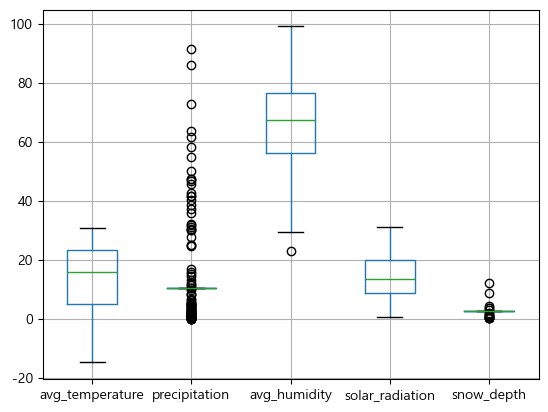

In [138]:
# 이상치 확인
# 상대습도를 제외한 강수량, 적설량 데이터는 계절적 특성으로인해 이상치로 분류됨됨

df2.boxplot(column=['avg_temperature','precipitation','avg_humidity','solar_radiation','snow_depth'])
plt.show()

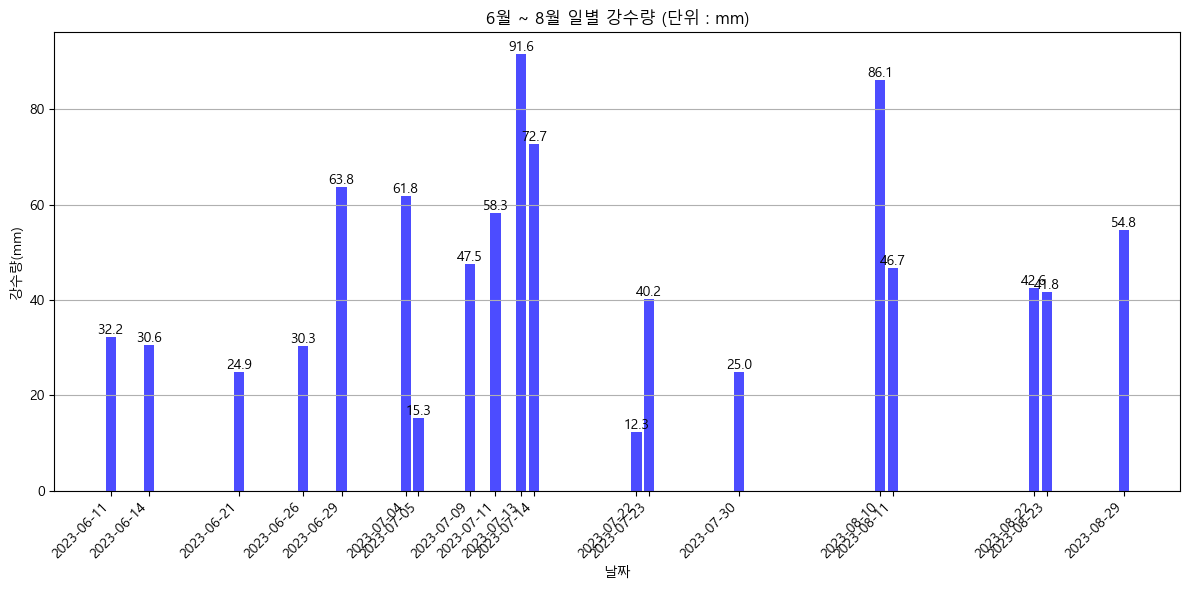

In [139]:
# 6월부터 8월까지의 데이터 추출
filtered_data = df2[(df2['date'].dt.month >= 6) & (df2['date'].dt.month <= 8)]

# 날짜별로 강수량 집계
daily_precipitation = filtered_data.groupby('date')['precipitation'].sum().reset_index()

# 평균값보다 큰 데이터만 추출
above_average_data = daily_precipitation[daily_precipitation['precipitation'] > df2['precipitation'].mean()]

# 시각화 (막대그래프)
plt.figure(figsize=(12, 6))
precipitation_bars = plt.bar(above_average_data['date'], above_average_data['precipitation'], color='blue', alpha=0.7)
plt.title('6월 ~ 8월 일별 강수량 (단위 : mm)')
plt.xlabel('날짜')
plt.ylabel('강수량(mm)')
plt.grid(axis='y')

# 막대 위 레이블 추가
for bar in precipitation_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 막대 아레 날짜 레이블 설정
plt.xticks(above_average_data['date'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

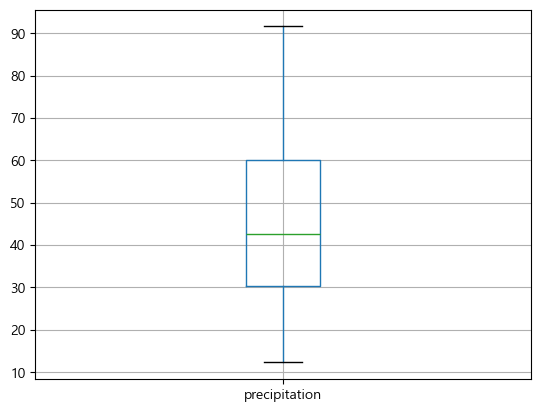

In [140]:
# 이상치 확인
# 계절적 패턴으로 인해 생기는 이상치였음을 확인
above_average_data.boxplot(column = ['precipitation'])
plt.show()

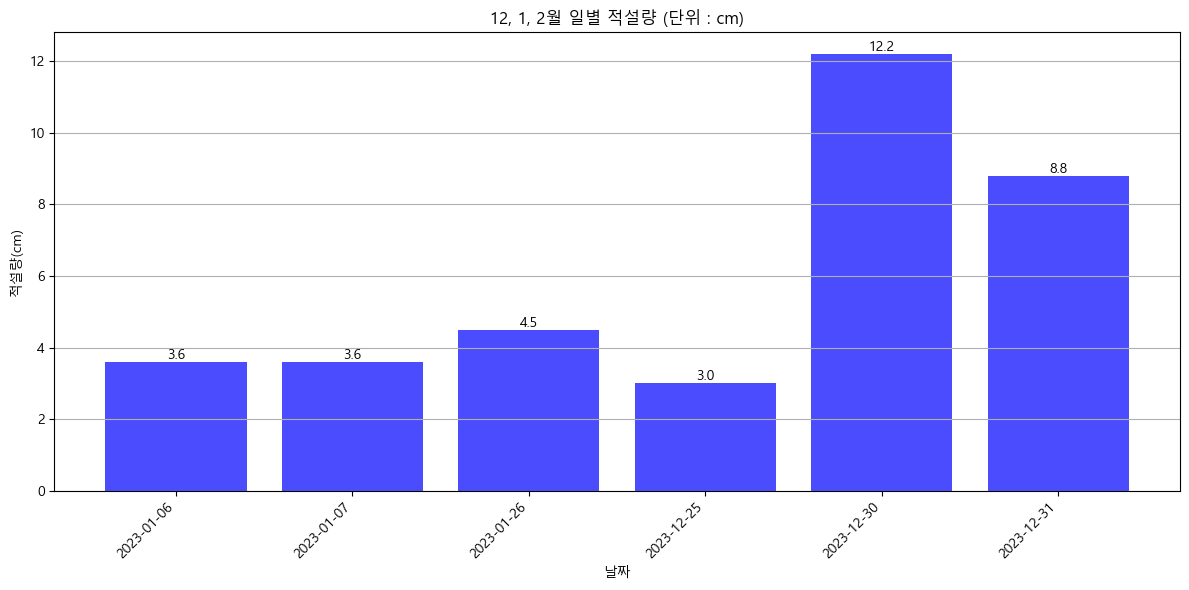

In [141]:
# 12, 1, 2월의 데이터 추출
filtered_snow_data = df2[(df2['date'].dt.month == 12) | (df2['date'].dt.month == 1) | (df2['date'].dt.month == 2)]

# 날짜별로 눈 깊이 집계
daily_snow_depth = filtered_snow_data.groupby('date')['snow_depth'].sum().reset_index()

# 평균값보다 큰 데이터만 추출
above_average_snow_data = daily_snow_depth[daily_snow_depth['snow_depth'] > daily_snow_depth['snow_depth'].mean() + 0.1]

# 시각화 (막대그래프)
plt.figure(figsize=(12, 6))

# 균일한 간격으로 x축 설정
x_positions = np.arange(len(above_average_snow_data))  # x축 위치 설정

# 막대그래프 생성
snow_depth_bars = plt.bar(x_positions, above_average_snow_data['snow_depth'], color='blue', alpha=0.7)

# x축 레이블 설정
plt.xticks(x_positions, above_average_snow_data['date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.title('12, 1, 2월 일별 적설량 (단위 : cm)')
plt.xlabel('날짜')
plt.ylabel('적설량(cm)')
plt.grid(axis='y')

# 막대 위 레이블 추가
for bar in snow_depth_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

count     6.000000
mean      5.950000
std       3.715777
min       3.000000
25%       3.600000
50%       4.050000
75%       7.725000
max      12.200000
Name: snow_depth, dtype: float64


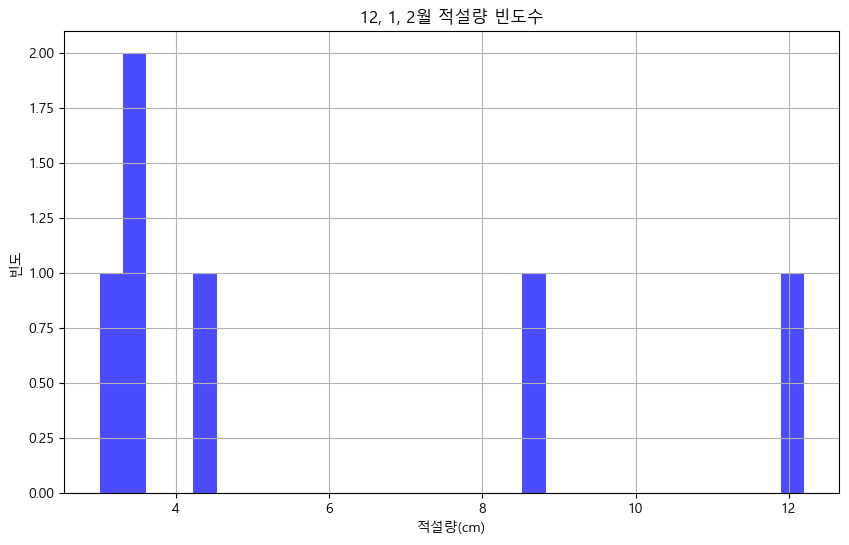

In [142]:
# 12, 1, 2월 데이터 추출
filtered_data = df2[(df2['date'].dt.month == 12) | (df2['date'].dt.month == 1) | (df2['date'].dt.month == 2)]

# 평균값 수치 제외
filtered_data = filtered_data[filtered_data['snow_depth'] > df2['snow_depth'].mean() + 0.1]

# 기초 통계량 계산
statistics = filtered_data['snow_depth'].describe()

# 결과 출력
print(statistics)

# 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['snow_depth'], bins=30, color='blue', alpha=0.7)
plt.title('12, 1, 2월 적설량 빈도수')
plt.xlabel('적설량(cm)')
plt.ylabel('빈도')
plt.grid()
plt.show()

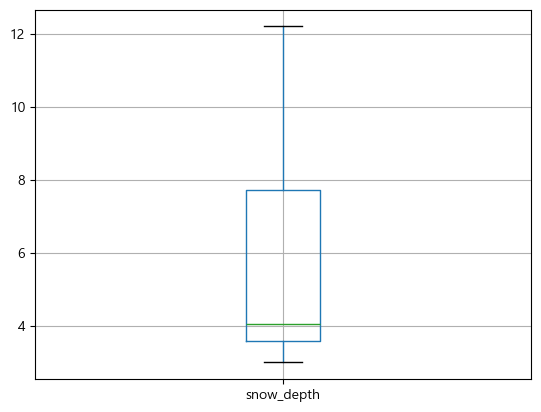

In [143]:
filtered_data.boxplot(column = ['snow_depth'])
plt.show()

In [144]:
# 이상치 처리(상대습도)
Q1 = df2['avg_humidity'].quantile(0.25)
Q3 = df2['avg_humidity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 상한 및 하한으로 클리핑
df2['avg_humidity'] = df2['avg_humidity'].clip(lower_bound, upper_bound)

## 특성 중요도 평가
##### 사용하고자 하는 특성이 예측 결과에 얼마나 영향을 미치는지 확인

In [145]:
# 데이터셋 병합(기상 데이터 + 공공자전거 데이터)
merge_data = pd.merge(df1, df2, on='date', how='inner')

In [146]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             365 non-null    datetime64[ns]
 1   count            365 non-null    int32         
 2   avg_temperature  365 non-null    float64       
 3   precipitation    365 non-null    float64       
 4   avg_humidity     365 non-null    float64       
 5   solar_radiation  365 non-null    float64       
 6   snow_depth       365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 18.7 KB


In [147]:
merge_data.head()

,date,count,avg_temperature,precipitation,avg_humidity,solar_radiation,snow_depth
0,2023-01-01,38037,-0.2,10.658667,54.5,10.81,2.80625
1,2023-01-02,56609,-4.5,10.658667,45.9,11.63,2.80625
2,2023-01-03,61252,-5.0,10.658667,49.0,11.77,2.80625
3,2023-01-04,67721,-1.8,10.658667,51.4,10.89,2.80625
4,2023-01-05,68711,-1.6,10.658667,58.1,6.09,2.80625


In [148]:
merge_data.tail()

,date,count,avg_temperature,precipitation,avg_humidity,solar_radiation,snow_depth
360,2023-12-27,82145,1.5,10.658667,76.6,9.47,2.80625
361,2023-12-28,82354,1.2,10.658667,69.5,9.25,2.80625
362,2023-12-29,84168,1.3,10.658667,71.0,5.43,2.80625
363,2023-12-30,15214,0.6,13.100000,92.0,0.69,12.20000
364,2023-12-31,29130,2.1,4.700000,95.5,3.06,8.80000


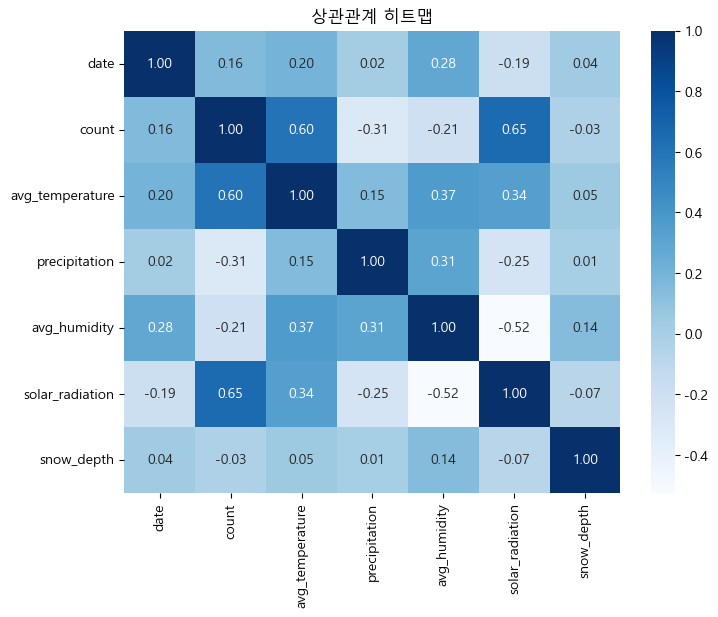

In [149]:
corr = merge_data.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('상관관계 히트맵')
plt.show()

In [150]:
# 독립변수와 종속변수 분리
# 독립변수 (기온, 습도, 일사량, 강수량, 적설량)
# 종속변수 (이용건수)
X = merge_data.drop(['count','date'], axis=1)
y = merge_data['count']

# 데이터 분할 (비율 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
# 특성 중요도 생성
importances = model.feature_importances_

# 특성 이름과 중요도를 데이터프레임으로 변환
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

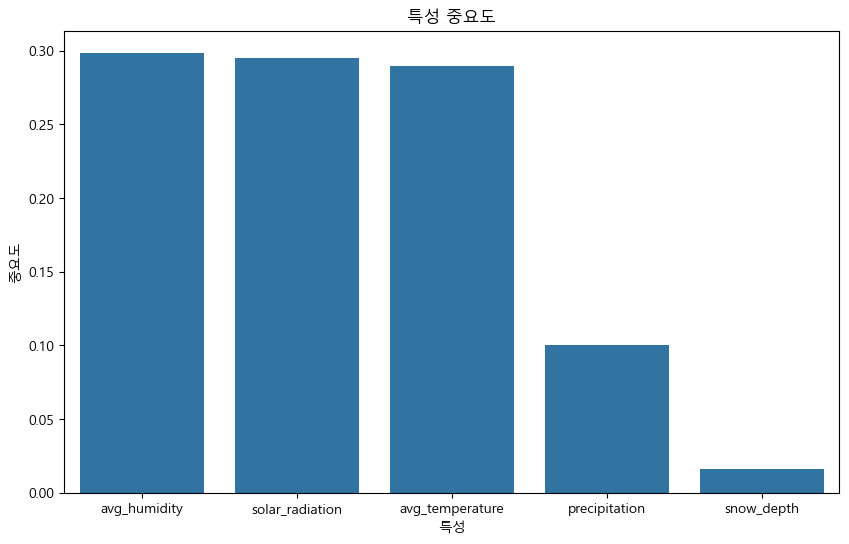

In [153]:
# 중요도를 내림차순으로 정렬
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature',y='Importance', data=feature_importance)
plt.title('특성 중요도')
plt.xlabel('특성')
plt.ylabel('중요도')
plt.show()

In [154]:
# 특성중요도가 낮은 강수량, 적설량을 데이터셋에서 제거
df = merge_data.drop(['precipitation', 'snow_depth'], axis=1)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             365 non-null    datetime64[ns]
 1   count            365 non-null    int32         
 2   avg_temperature  365 non-null    float64       
 3   avg_humidity     365 non-null    float64       
 4   solar_radiation  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 13.0 KB


In [156]:
df.head()

,date,count,avg_temperature,avg_humidity,solar_radiation
0,2023-01-01,38037,-0.2,54.5,10.81
1,2023-01-02,56609,-4.5,45.9,11.63
2,2023-01-03,61252,-5.0,49.0,11.77
3,2023-01-04,67721,-1.8,51.4,10.89
4,2023-01-05,68711,-1.6,58.1,6.09


In [157]:
df.tail()

,date,count,avg_temperature,avg_humidity,solar_radiation
360,2023-12-27,82145,1.5,76.6,9.47
361,2023-12-28,82354,1.2,69.5,9.25
362,2023-12-29,84168,1.3,71.0,5.43
363,2023-12-30,15214,0.6,92.0,0.69
364,2023-12-31,29130,2.1,95.5,3.06


### ML
- 선형 회귀
- 랜덤 포레스트 회귀
- XGBoost

### 결정계수를 통한 예측모델 선정

In [158]:
# 데이터 전처리
X = df[['avg_temperature', 'avg_humidity', 'solar_radiation']]
y = df['count']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [159]:
# 모델 정의
models = {
    '선형 회귀': LinearRegression(),
    '랜덤 포레스트': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# R-squared 점수 저장
r2_scores = {}

# 각 모델 학습 및 R-squared 점수 계산
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

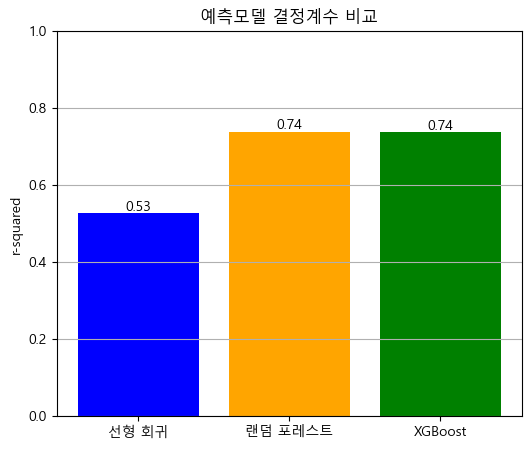

In [160]:
# 시각화(선형 회귀 / 랜덤 포레스트 회귀 / XGBoost의 R-squared 값)
# XGBoost모델 채택
plt.figure(figsize=(6, 5))
bars = plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'orange', 'green'])
plt.title('예측모델 결정계수 비교')
plt.ylabel('r-squared')
plt.ylim(0, 1) 
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
    
plt.show()

### XGBoost

In [182]:
# 데이터 전처리
X = df[['avg_temperature', 'avg_humidity', 'solar_radiation']]
y = df['count']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [183]:
# XGBoost 모델 생성 및 학습
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 684101504.00
R² Score: 0.74


In [184]:
# DMatrix 객체 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 모델 학습에 사용할 매개변수 설정
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'random_state': 42
}

# 평가용 데이터 설정
evals = [(dtrain, 'train'), (dtest, 'test')]

# 모델 학습 (evals_result를 저장하기 위해 반환값을 받음)
evals_result = {}
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, evals_result=evals_result, early_stopping_rounds=10, verbose_eval=True)

# 예측
y_pred = model.predict(dtest)

# RMSE 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

[0]	train-rmse:40606.68931	test-rmse:41047.16653
[1]	train-rmse:31599.26677	test-rmse:33899.67542
[2]	train-rmse:25356.82305	test-rmse:29430.04737
[3]	train-rmse:20874.98822	test-rmse:27255.26706
[4]	train-rmse:17996.75492	test-rmse:26143.76180
[5]	train-rmse:15449.53178	test-rmse:25681.07874
[6]	train-rmse:13595.90518	test-rmse:25517.00233
[7]	train-rmse:12290.45080	test-rmse:25154.60127
[8]	train-rmse:11275.14504	test-rmse:24993.49567
[9]	train-rmse:10490.29992	test-rmse:25031.66709
[10]	train-rmse:9529.11204	test-rmse:25216.94435
[11]	train-rmse:8929.43157	test-rmse:25136.19514
[12]	train-rmse:8551.61105	test-rmse:25154.15145
[13]	train-rmse:7956.93242	test-rmse:25244.59527
[14]	train-rmse:7532.44523	test-rmse:25334.60198
[15]	train-rmse:7049.82617	test-rmse:25435.53822
[16]	train-rmse:6866.47563	test-rmse:25396.29955
[17]	train-rmse:6540.74363	test-rmse:25542.60343
RMSE: 25641.72


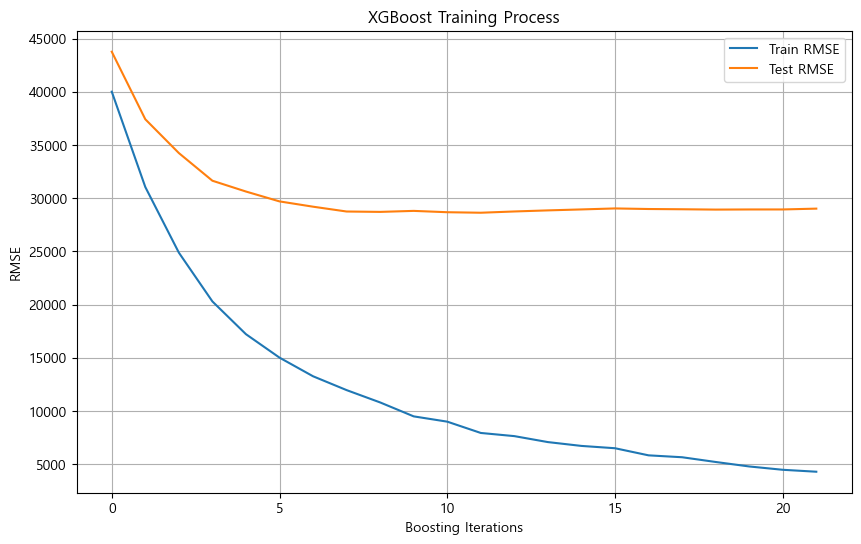

In [181]:
# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train']['rmse'], label='Train RMSE')
plt.plot(evals_result['test']['rmse'], label='Test RMSE')
plt.xlabel('Boosting Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training Process')
plt.legend()
plt.grid()
plt.show()

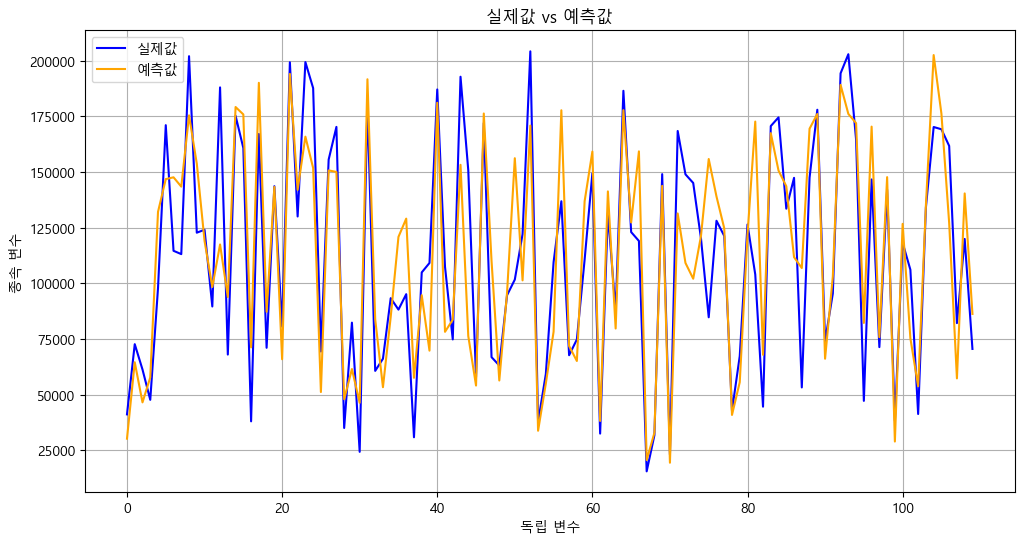

In [173]:
# 시각화 (선 그래프)
# 예측값 선 그래프가 실제값 선 그래프와 일치할수록 예측이 정확함
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='실제값', linestyle='-', color='blue')
plt.plot(y_pred, label='예측값', linestyle='-', color='orange')
plt.title('실제값 vs 예측값')
plt.xlabel('독립 변수')
plt.ylabel('종속 변수')
plt.legend()
plt.grid()
plt.show()

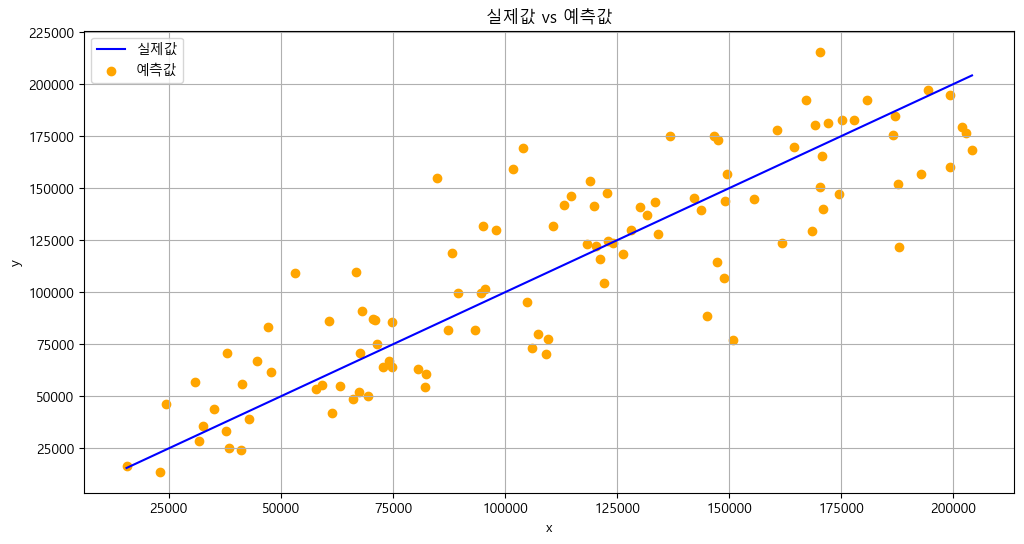

In [ ]:
# 시각화 (산점도)
# 실제값 선에 점들이 가깝게 위치할수록 데이터를 예측이 정확함
plt.figure(figsize=(12, 6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-', label='실제값')  # y=x 선
plt.scatter(y_test, y_pred, color='orange', label='예측값')
plt.title('실제값 vs 예측값')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

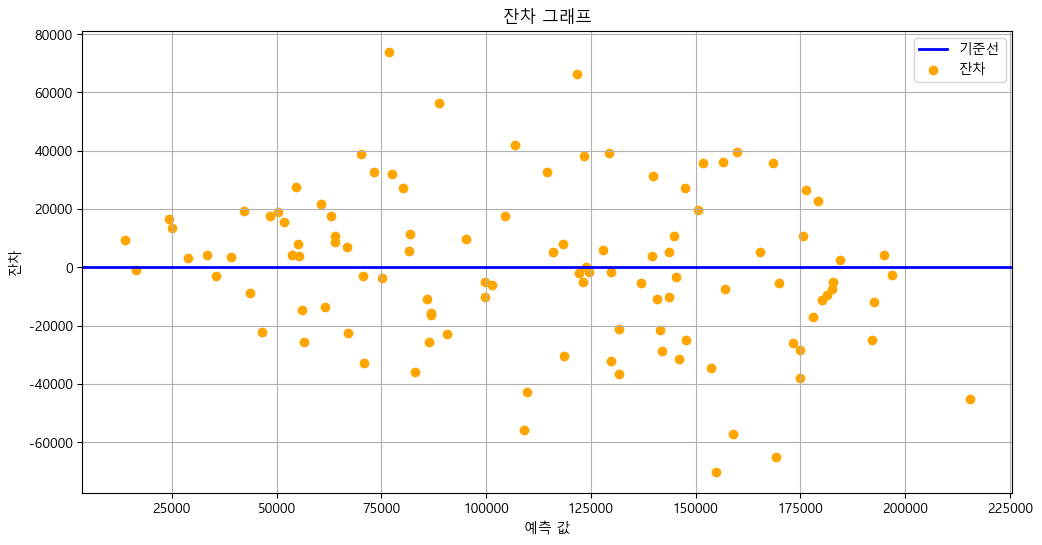

In [ ]:
# 시각화 (잔차 그래프)
# 잔차가 0을 중심으로 고르르게 분포하면 모델이 잘 작동하고 있음을 의미함
residuals = y_test.reset_index(drop=True) - y_pred
plt.figure(figsize=(12, 6))
plt.axhline(0, color='blue', linewidth=2, label='기준선')
plt.scatter(y_pred, residuals, color='orange', label='잔차')
plt.title('잔차 그래프')
plt.xlabel('예측 값')
plt.ylabel('잔차')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 새로운 데이터 입력받기 (2023-06-25 데이터 입력)
# 기온 : 28.2 / 습도 : 64.9 / 일사량 : 23.62
# 실제 이용건수 : 133556 / 예측 이용건수 : 134086
new_data = {
    'avg_temperature': float(28.2),
    'avg_humidity': float(64.9),
    'solar_radiation': float(23.62)
}

# 새로운 데이터 스케일링
new_data_scaled = scaler.transform([[new_data['avg_temperature'], new_data['avg_humidity'], new_data['solar_radiation']]])

# 예측
predicted_count = model.predict(new_data_scaled)

# 결과 출력
print("실제 공공자전거 이용 건수 : 133556건")
print(f"예상되는 공공자전거 이용 건수: {predicted_count[0]:.0f}건")

실제 공공자전거 이용 건수 : 133556건
예상되는 공공자전거 이용 건수: 134086건


c:\AiProject\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
# CSV 파일로 저장
df.to_csv('dataset/weather_bicycle.csv')

print("저장완료.")

저장완료.



페어프로그래밍을 진행하면서 <br>
데이터 모델링 부분에 있어 결정계수로만 최적 모델을 선정했는데 <br>
MSE나 MAE 그리고 RMSE 등 평가지표를 사용해 최적 모델을 선정하고 싶습니다. <br>